# Logistic Regression Project
In this project we will be working with a candy data set, indicating whether or not a particular kind is chocolate We will try to create a model that will predict whether or not it's chocolate based on the features of that candy.

This data set contains the following features:

- competitorname : The candy name
- chocolate : had 2 unique feature 1 for chocolate 0 for not chocolate
- fruity : had 2 unique feature 1 for fruity 0 for not fruity
- caramel : had 2 unique feature 1 for caramel 0 for not caramel
- peanutyalmondy : had 2 unique feature 1 for peanutyalmondy 0 for not peanutyalmondy
- nougat : had 2 unique feature 1 for nougat 0 for not nougat
- crispedricewafer : had 2 unique feature 1 for crispedricewafer 0 for not crispedricewafer
- hard : had 2 unique feature 1 for hard 0 for not hard
- bar pluribus : had 2 unique feature 1 for bar pluribus 0 for not bar pluribus
- sugarpercent : The precentage of sugar in candy
- pricepercent : The precentage of candy price
- winpercent : he precentage of win

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight')

# Gather Data

In [2]:
df = pd.read_csv(r'Downloads\task\candy-data.csv')

In [3]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [4]:
# shape of data
df.shape

(85, 13)

In [5]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB


In [6]:
# display the number of unique candy in the data
df.competitorname.nunique()

85

In [7]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


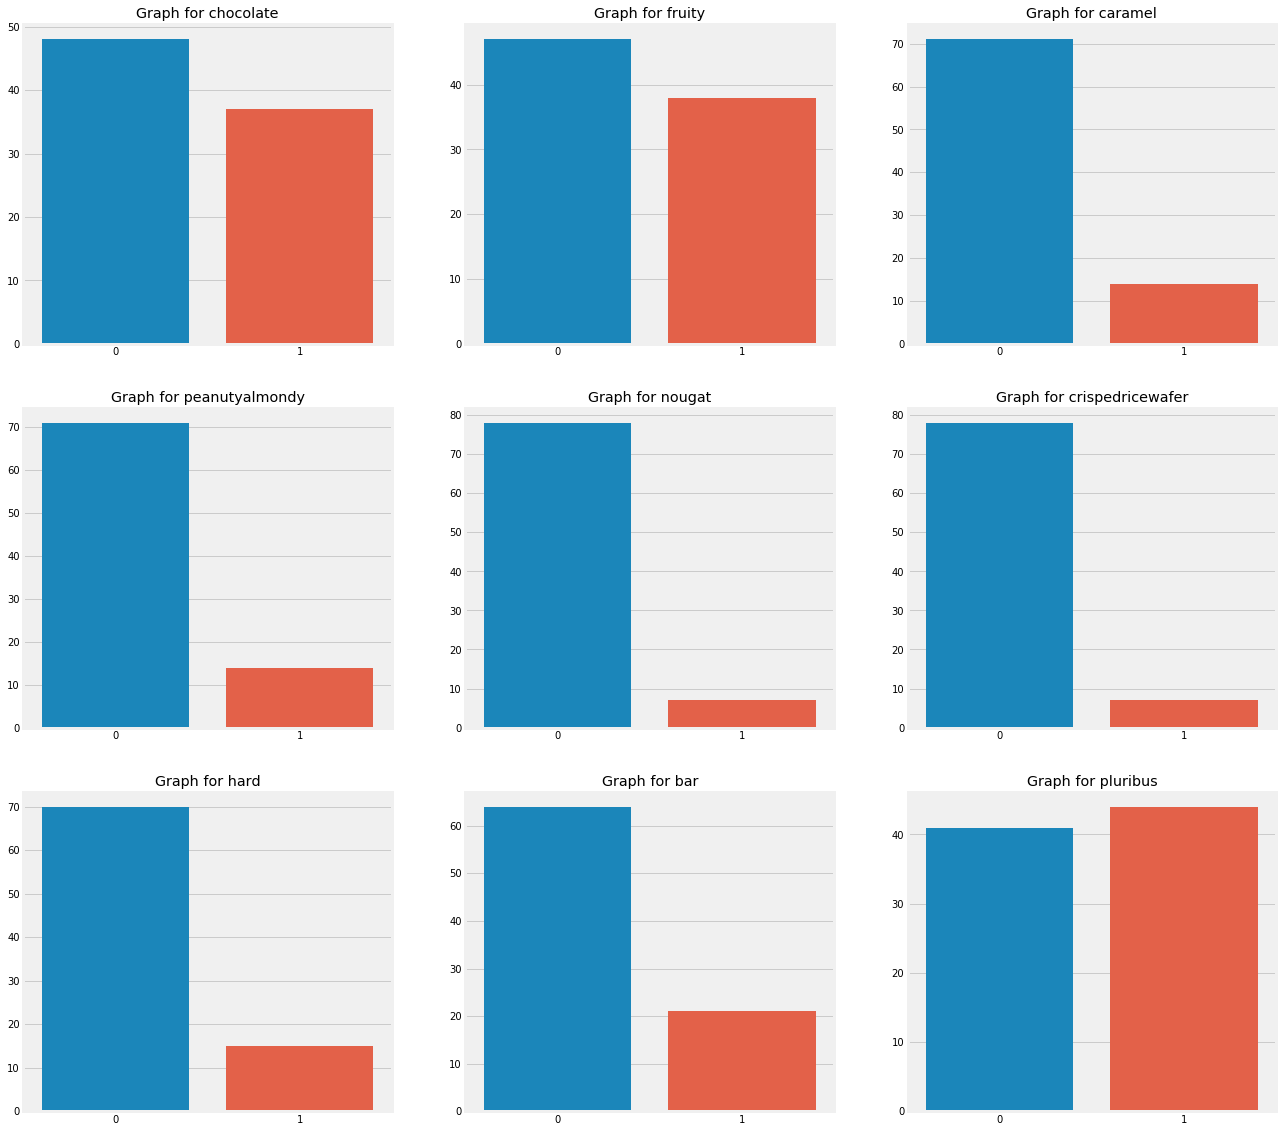

In [8]:
# create a barplot for all discreat feature 
#each plot compare between number of 1 , 0 which represent True or false for the column name

plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
counts = df['chocolate'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for chocolate')
    
plt.subplot(3,3,2)
counts = df['fruity'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for fruity')

plt.subplot(3,3,3)
counts = df['caramel'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for caramel')

plt.subplot(3,3,4)
counts = df['peanutyalmondy'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for peanutyalmondy')

plt.subplot(3,3,5)
counts = df['nougat'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for nougat')

plt.subplot(3,3,6)
counts = df['crispedricewafer'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for crispedricewafer')

plt.subplot(3,3,7)
counts = df['hard'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for hard')

plt.subplot(3,3,8)
counts = df['bar'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for bar')

plt.subplot(3,3,9)
counts = df['pluribus'].value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.title('Graph for pluribus')

plt.show()

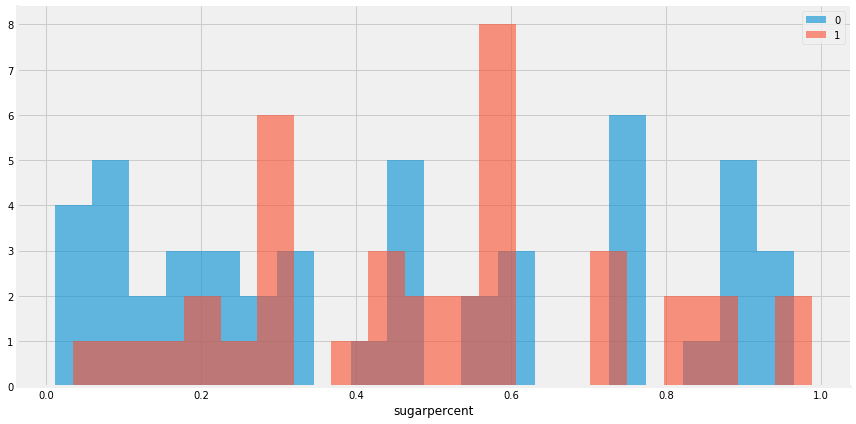

In [9]:
# create a histogram for suger percent compare between chocolate candy and not chocolate candy
g = sns.FacetGrid(df,hue='chocolate',height=6,aspect=2)
g.map(plt.hist,'sugarpercent',alpha=0.6,bins=20)
plt.legend()
plt.show()

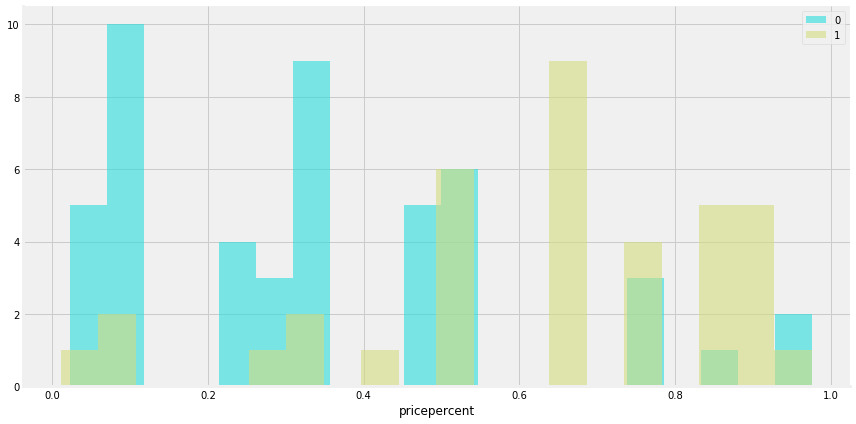

In [10]:
# create a histogram for price percent compare between chocolate candy and not chocolate candy
g = sns.FacetGrid(df,hue='chocolate',height=6,aspect=2,palette='rainbow')
g.map(plt.hist,'pricepercent',alpha=0.6,bins=20)
plt.legend()
plt.show()

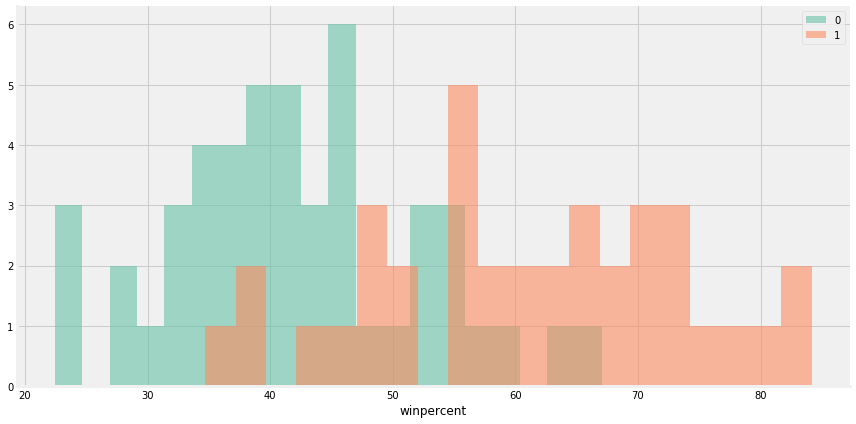

In [11]:
# create a histogram for win percent compare between chocolate candy and not chocolate candy
g = sns.FacetGrid(df,hue='chocolate',height=6,aspect=2,palette='Set2')
g.map(plt.hist,'winpercent',alpha=0.6,bins=20)
plt.legend()
plt.show()

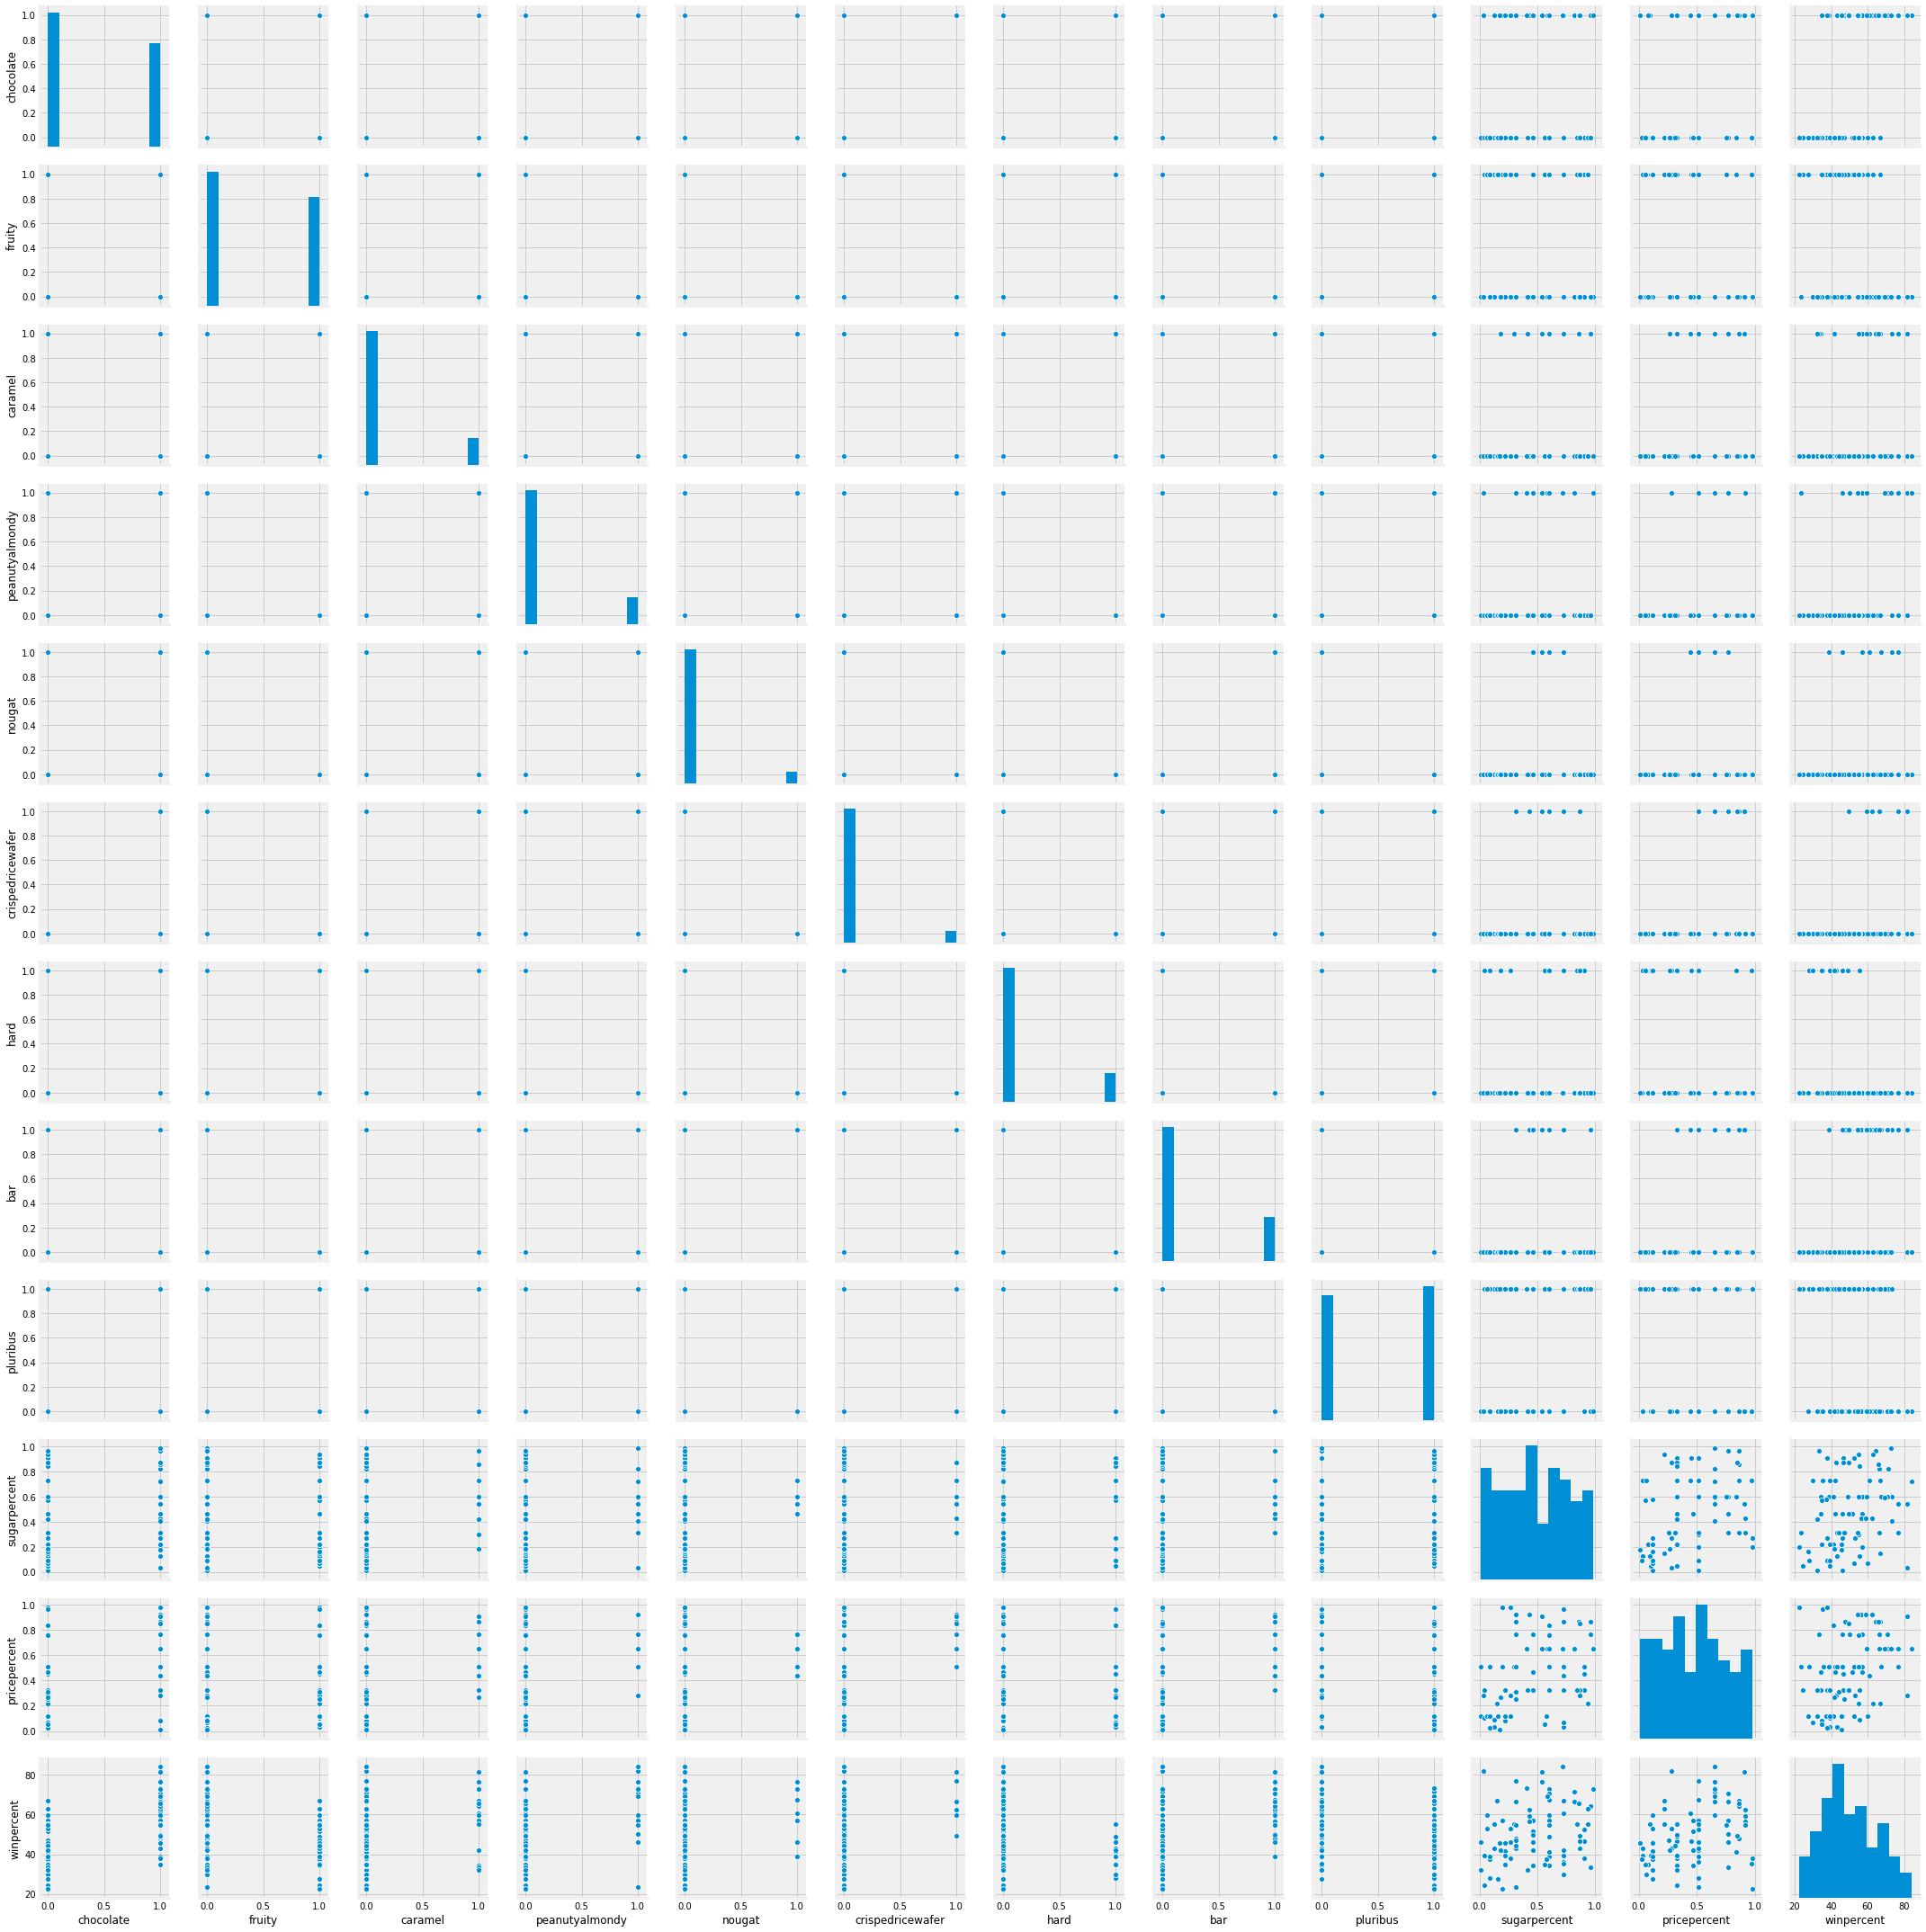

In [12]:
# create a pairplot
sns.pairplot(df)

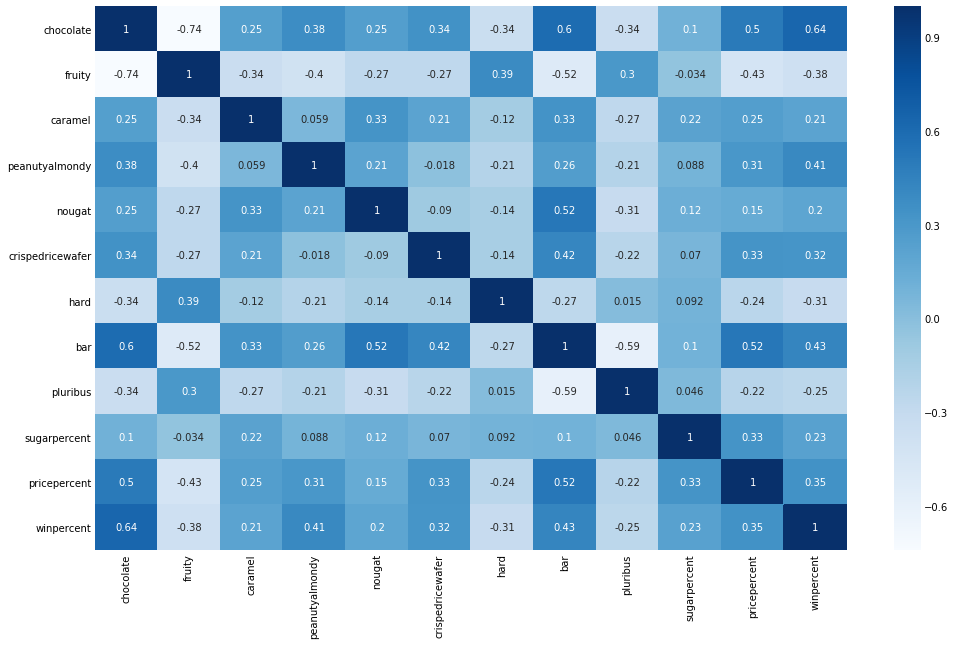

In [13]:
# create a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [14]:
# drop competitorname column
df.drop('competitorname',axis=1,inplace=True)

# Logistic Regression Without Feature Selection

**Split the data into training set and testing set using train_test_split**

In [15]:
X = df.drop('chocolate',axis = 1)
y = df['chocolate']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [19]:
logmodel.fit(X_train,y_train)

C:\Users\omar mohamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predict_no_FeatureSelection = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,predict_no_FeatureSelection))
print('**********************************************')
print(classification_report(y_test,predict_no_FeatureSelection))
print('**********************************************')

[[15  0]
 [ 3  8]]
**********************************************
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.73      0.84        11

    accuracy                           0.88        26
   macro avg       0.92      0.86      0.88        26
weighted avg       0.90      0.88      0.88        26

**********************************************


# Logistic Regression With Feature Selection

## Feature Importance method


In [23]:
X = df.drop('chocolate',axis = 1)
y = df['chocolate']

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\omar mohamed\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
model.feature_importances_

array([0.35929279, 0.00909552, 0.03944191, 0.02437292, 0.01171806,
       0.05397198, 0.08759457, 0.05344035, 0.08410166, 0.12879389,
       0.14817634])

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

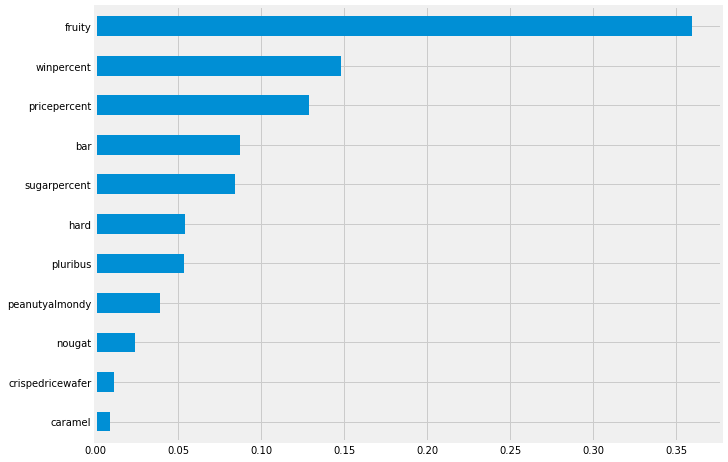

In [28]:
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')

In [29]:
X = df.drop(['chocolate','caramel','crispedricewafer','peanutyalmondy'],axis=1)
y = df['chocolate']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predict_feature_importances = logmodel.predict(X_test)

C:\Users\omar mohamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
print(confusion_matrix(y_test,predict_feature_importances))
print('**********************************************')
print(classification_report(y_test,predict_feature_importances))
print('**********************************************')

[[14  1]
 [ 1 10]]
**********************************************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.91      0.91      0.91        11

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26

**********************************************


## chi2 method

In [33]:
X = df.drop('chocolate',axis = 1)
y = df['chocolate']

In [34]:
from sklearn.feature_selection import SelectKBest

In [35]:
from sklearn.feature_selection import chi2

In [36]:
best_feature = SelectKBest(score_func=chi2,k=X.shape[1])

In [37]:
fit = best_feature.fit(X,y)

In [38]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [39]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
featureScores = featureScores.sort_values(by='Score',ascending=False).reset_index(drop=True)

In [40]:
featureScores

,Feature,Score
0,winpercent,146.443081
1,fruity,25.857056
2,bar,22.842369
3,peanutyalmondy,10.135296
4,crispedricewafer,9.081081
5,hard,8.292042
6,nougat,5.067648
7,pluribus,4.730549
8,caramel,4.433076
9,pricepercent,3.725465


In [41]:
X = df.drop(['chocolate','pluribus','caramel','pricepercent','sugarpercent'],axis=1)
y = df['chocolate']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [43]:
logmodel = LogisticRegression()

In [44]:
logmodel.fit(X_train,y_train)

C:\Users\omar mohamed\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predict_chi2 = logmodel.predict(X_test)

In [46]:
print(confusion_matrix(y_test,predict_chi2))
print('**********************************************')
print(classification_report(y_test,predict_chi2))
print('**********************************************')

[[15  0]
 [ 0 11]]
**********************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

**********************************************
